In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('C:\\python\\heart failure\\heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data cleaning

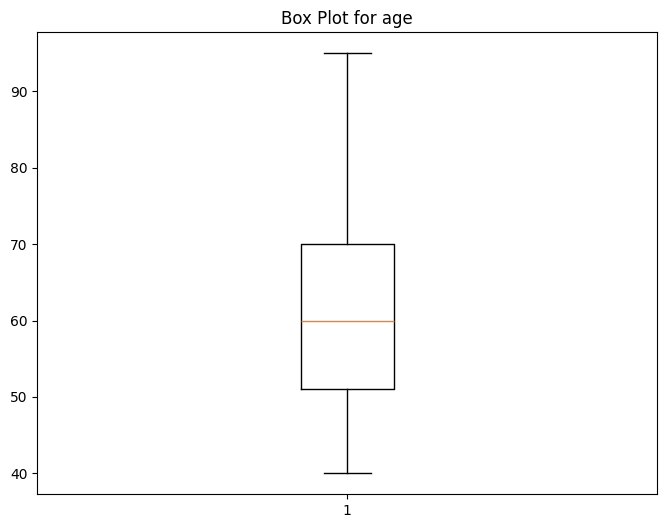

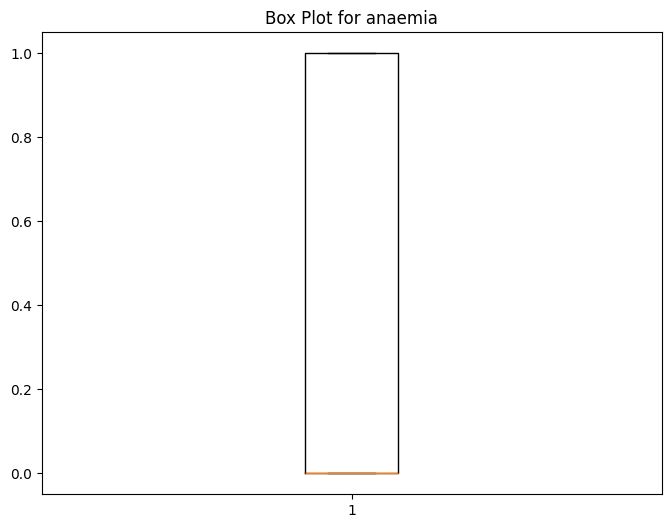

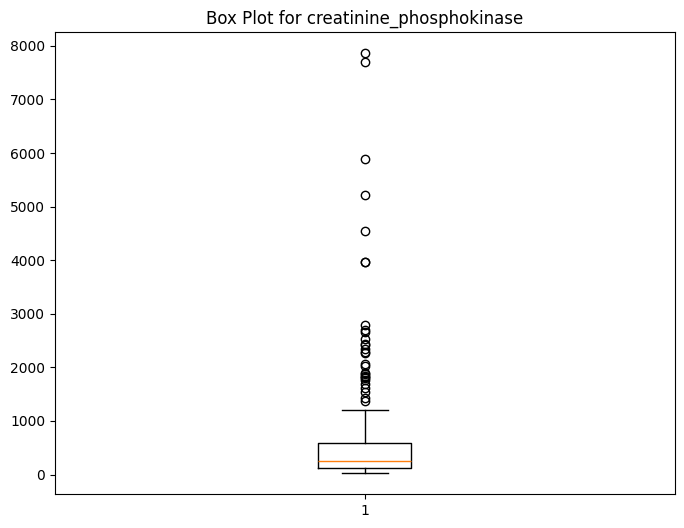

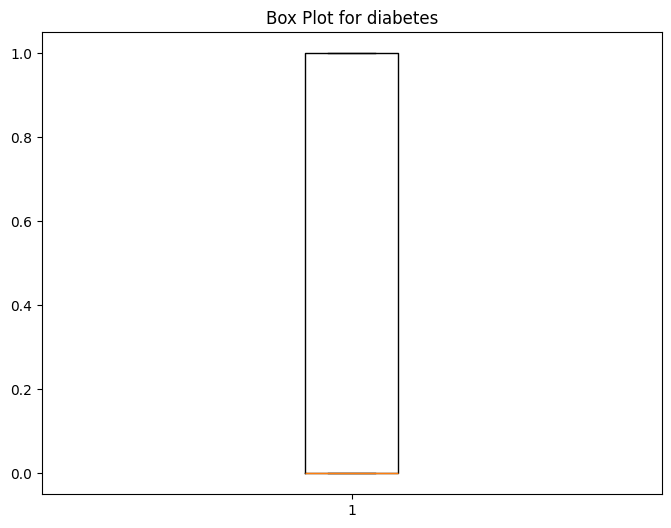

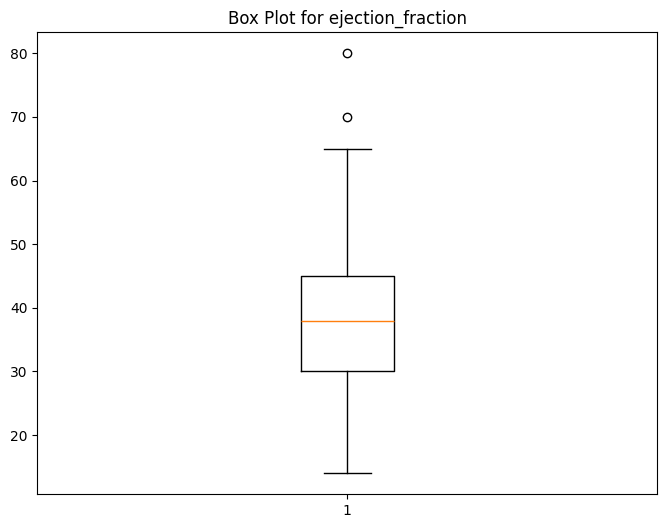

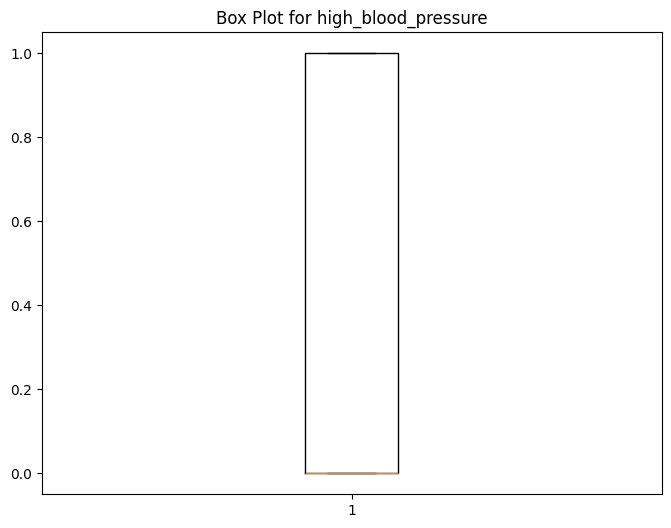

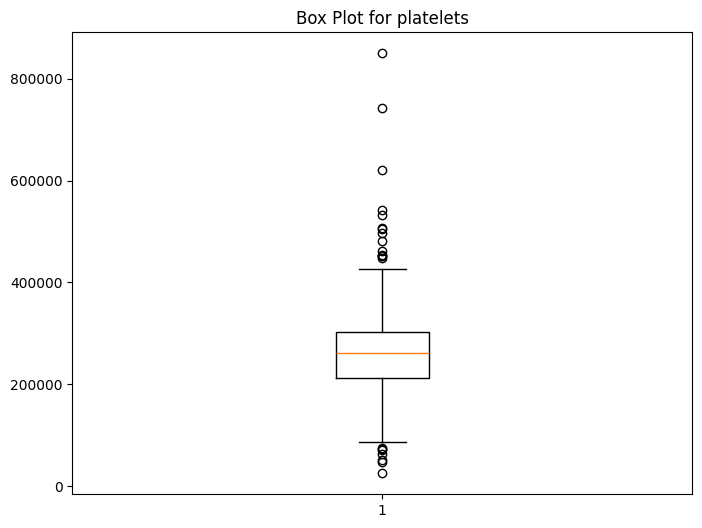

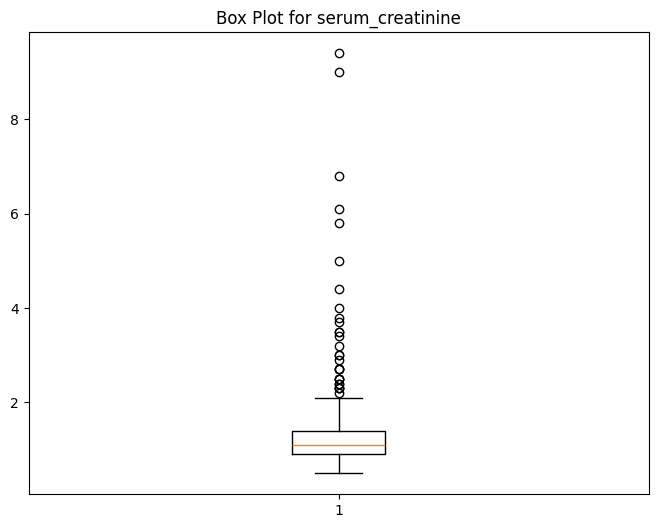

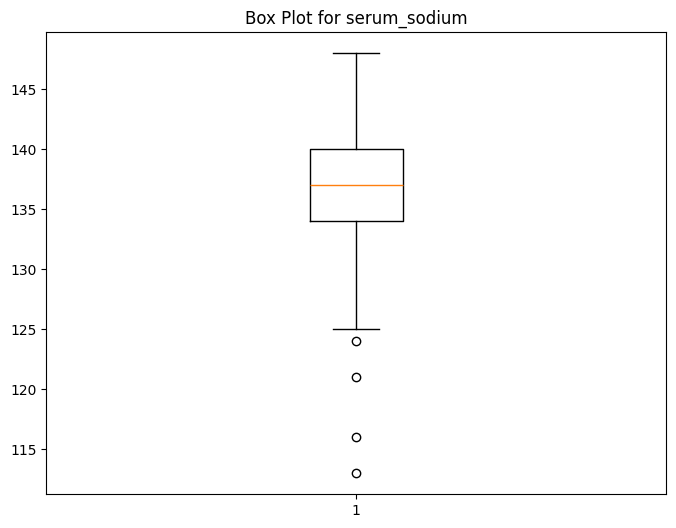

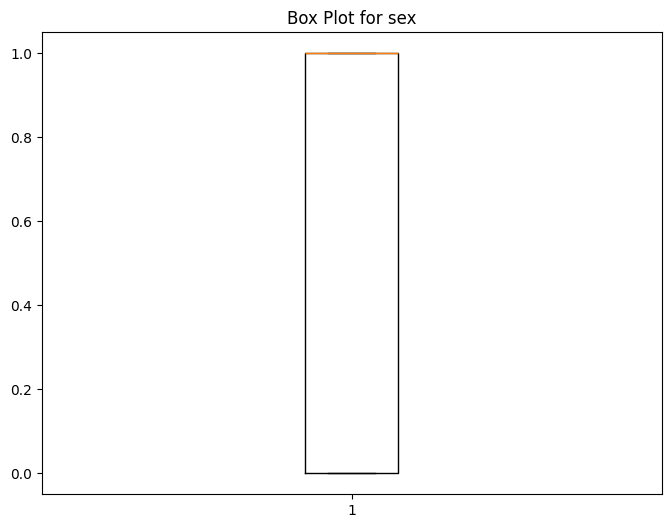

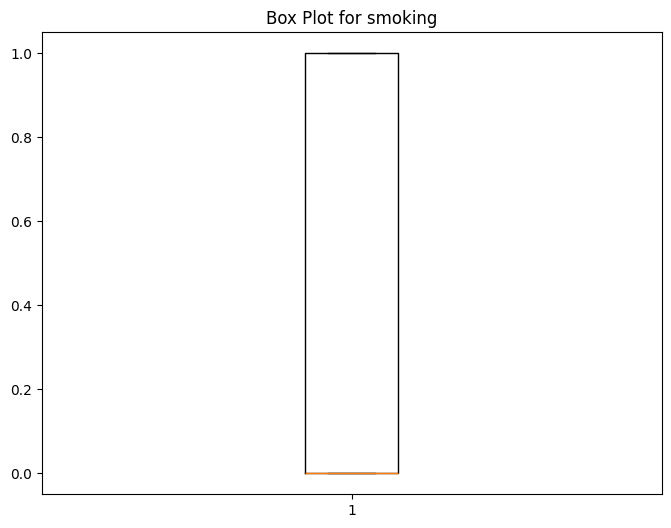

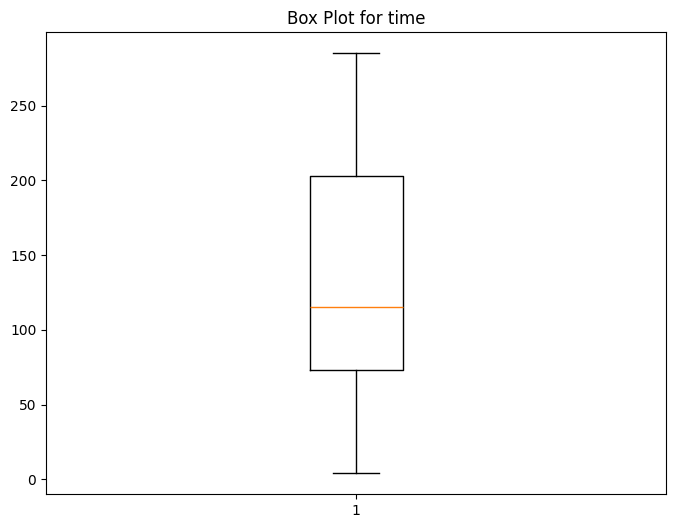

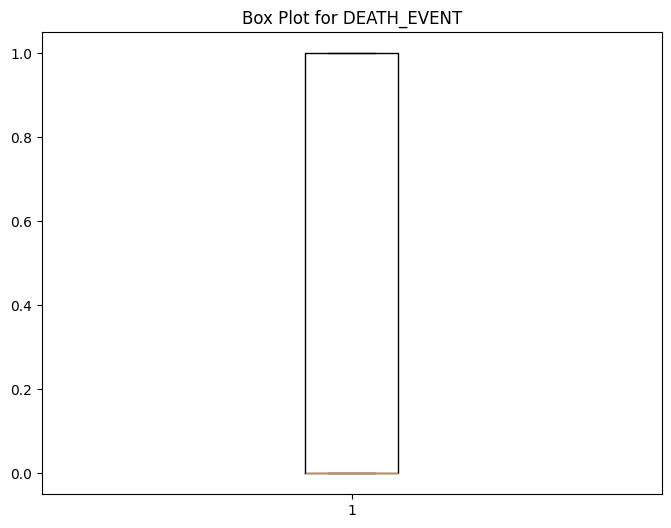

In [7]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [12]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers=(df[col] < lower_bound ) | (df[col] > upper_bound)
        df=df[~outliers]
    return df
# Remove outliers
df = remove_outliers(df)

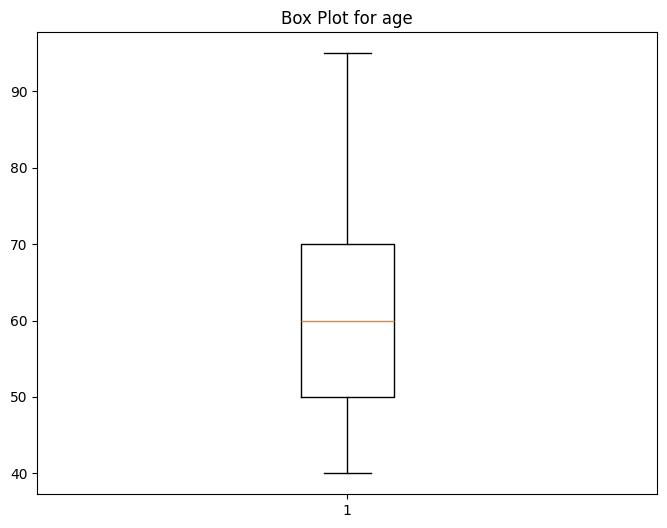

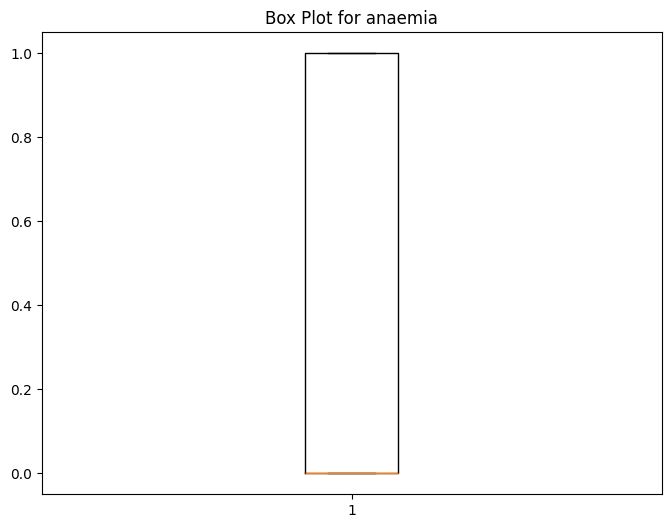

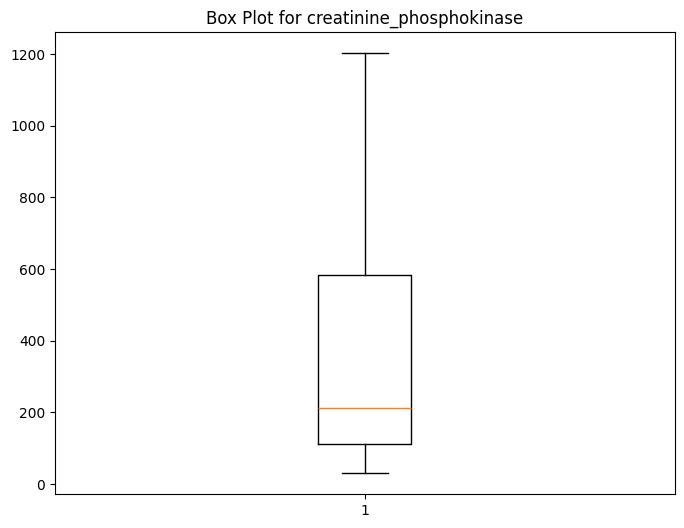

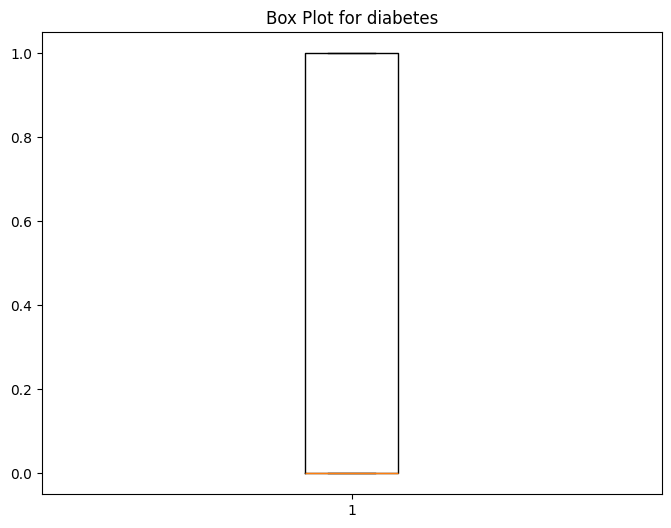

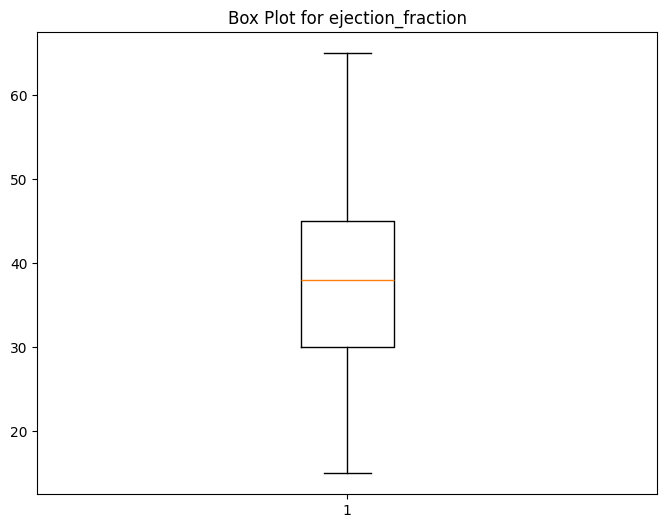

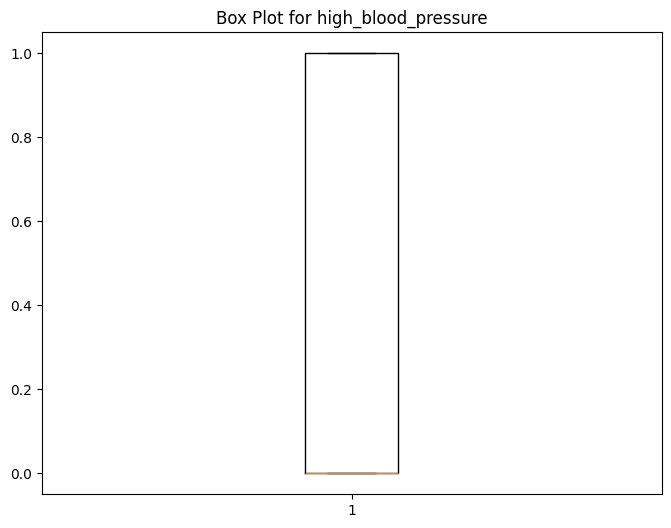

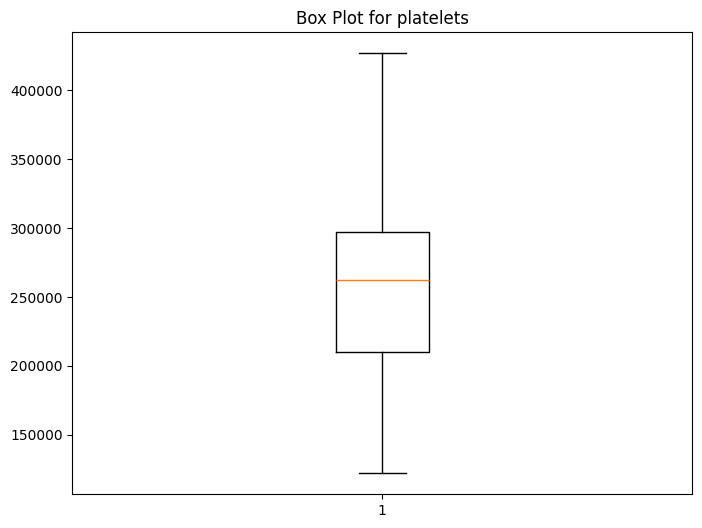

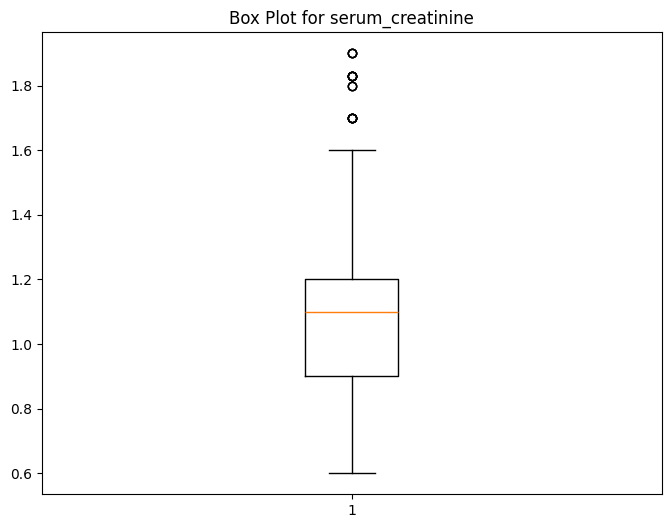

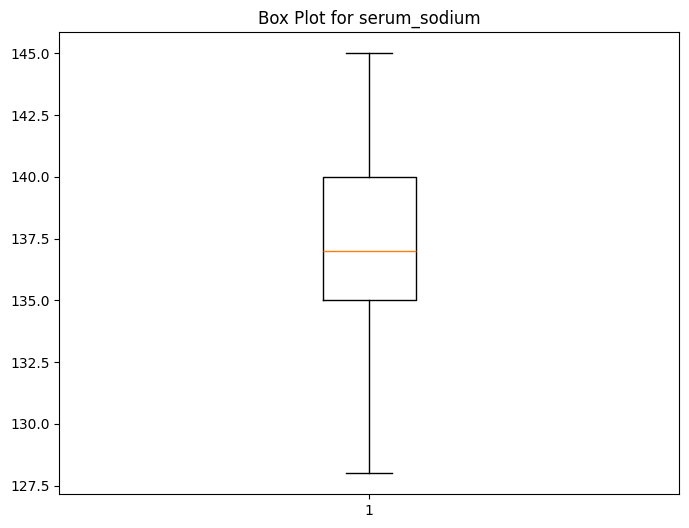

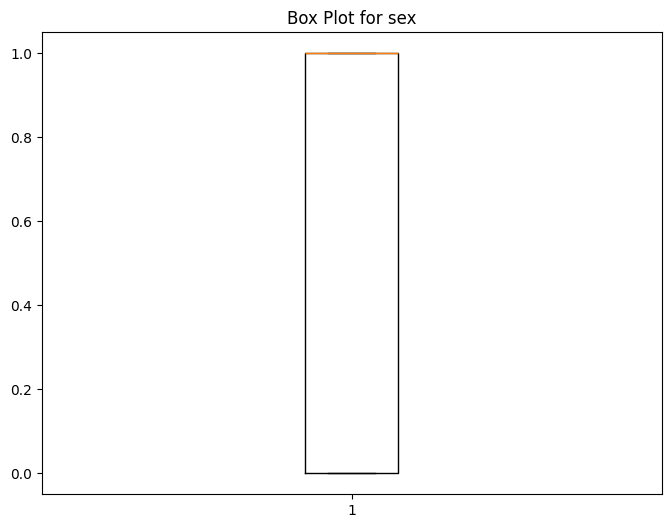

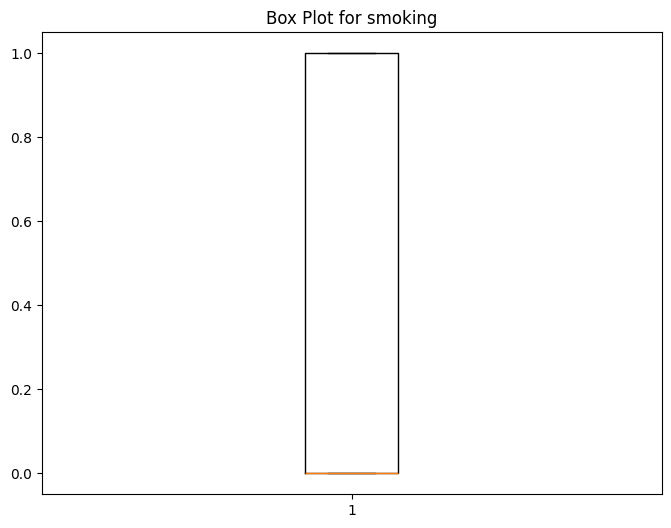

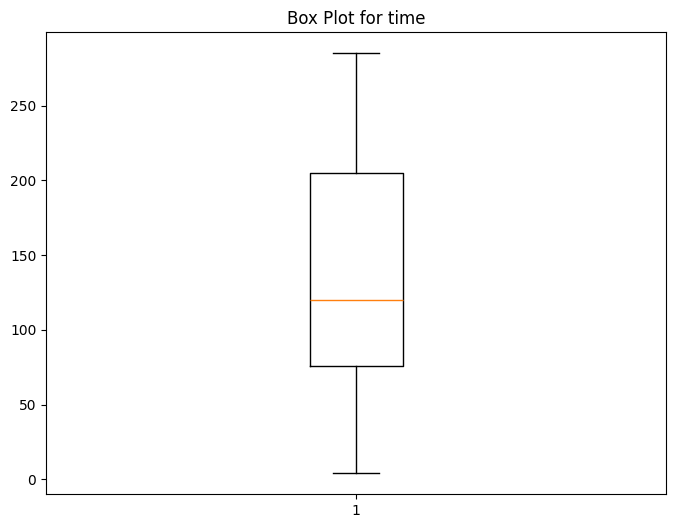

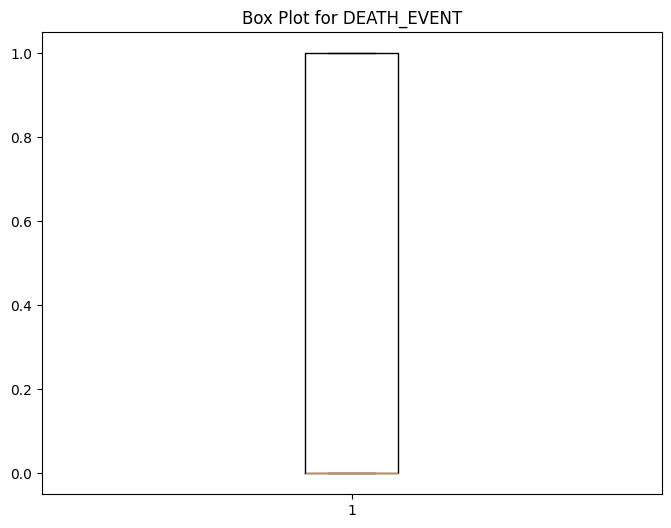

In [14]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [10]:
df.shape

(224, 13)

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1


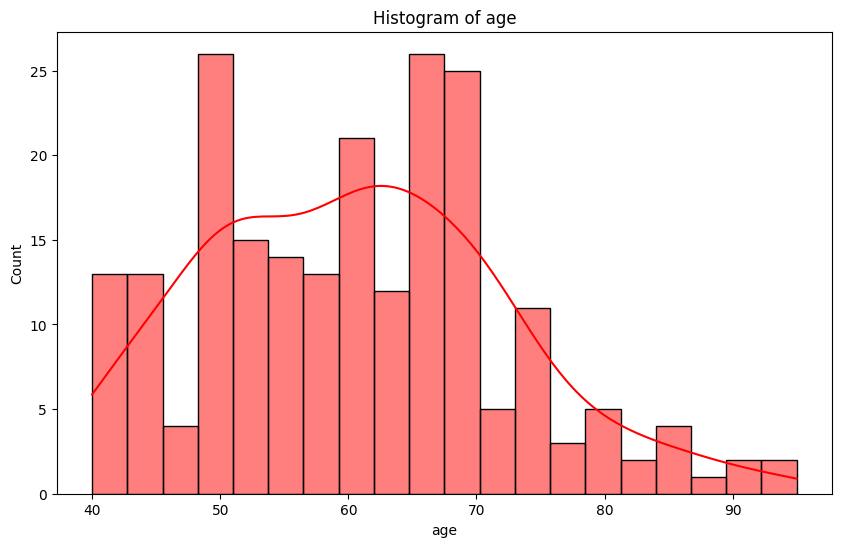

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde = True , color='red', bins = 20)
plt.title('Histogram of age')
plt.show()

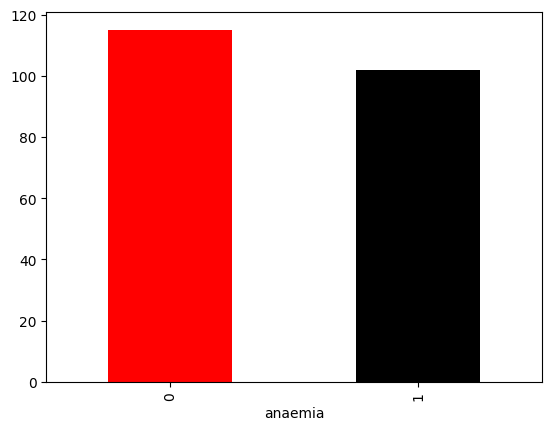

In [24]:
# anaemia 
df['anaemia'].value_counts().plot(kind = 'bar',color=['red','black'])
plt.show()
# more than half of the people have anaemia

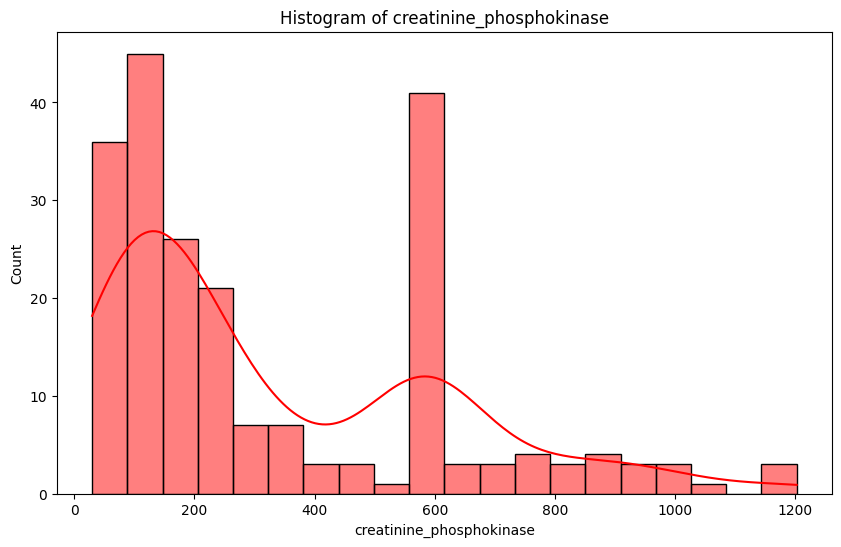

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['creatinine_phosphokinase'], kde = True , color='red', bins = 20)
plt.title('Histogram of creatinine_phosphokinase')
plt.show()

<Figure size 1200x800 with 0 Axes>

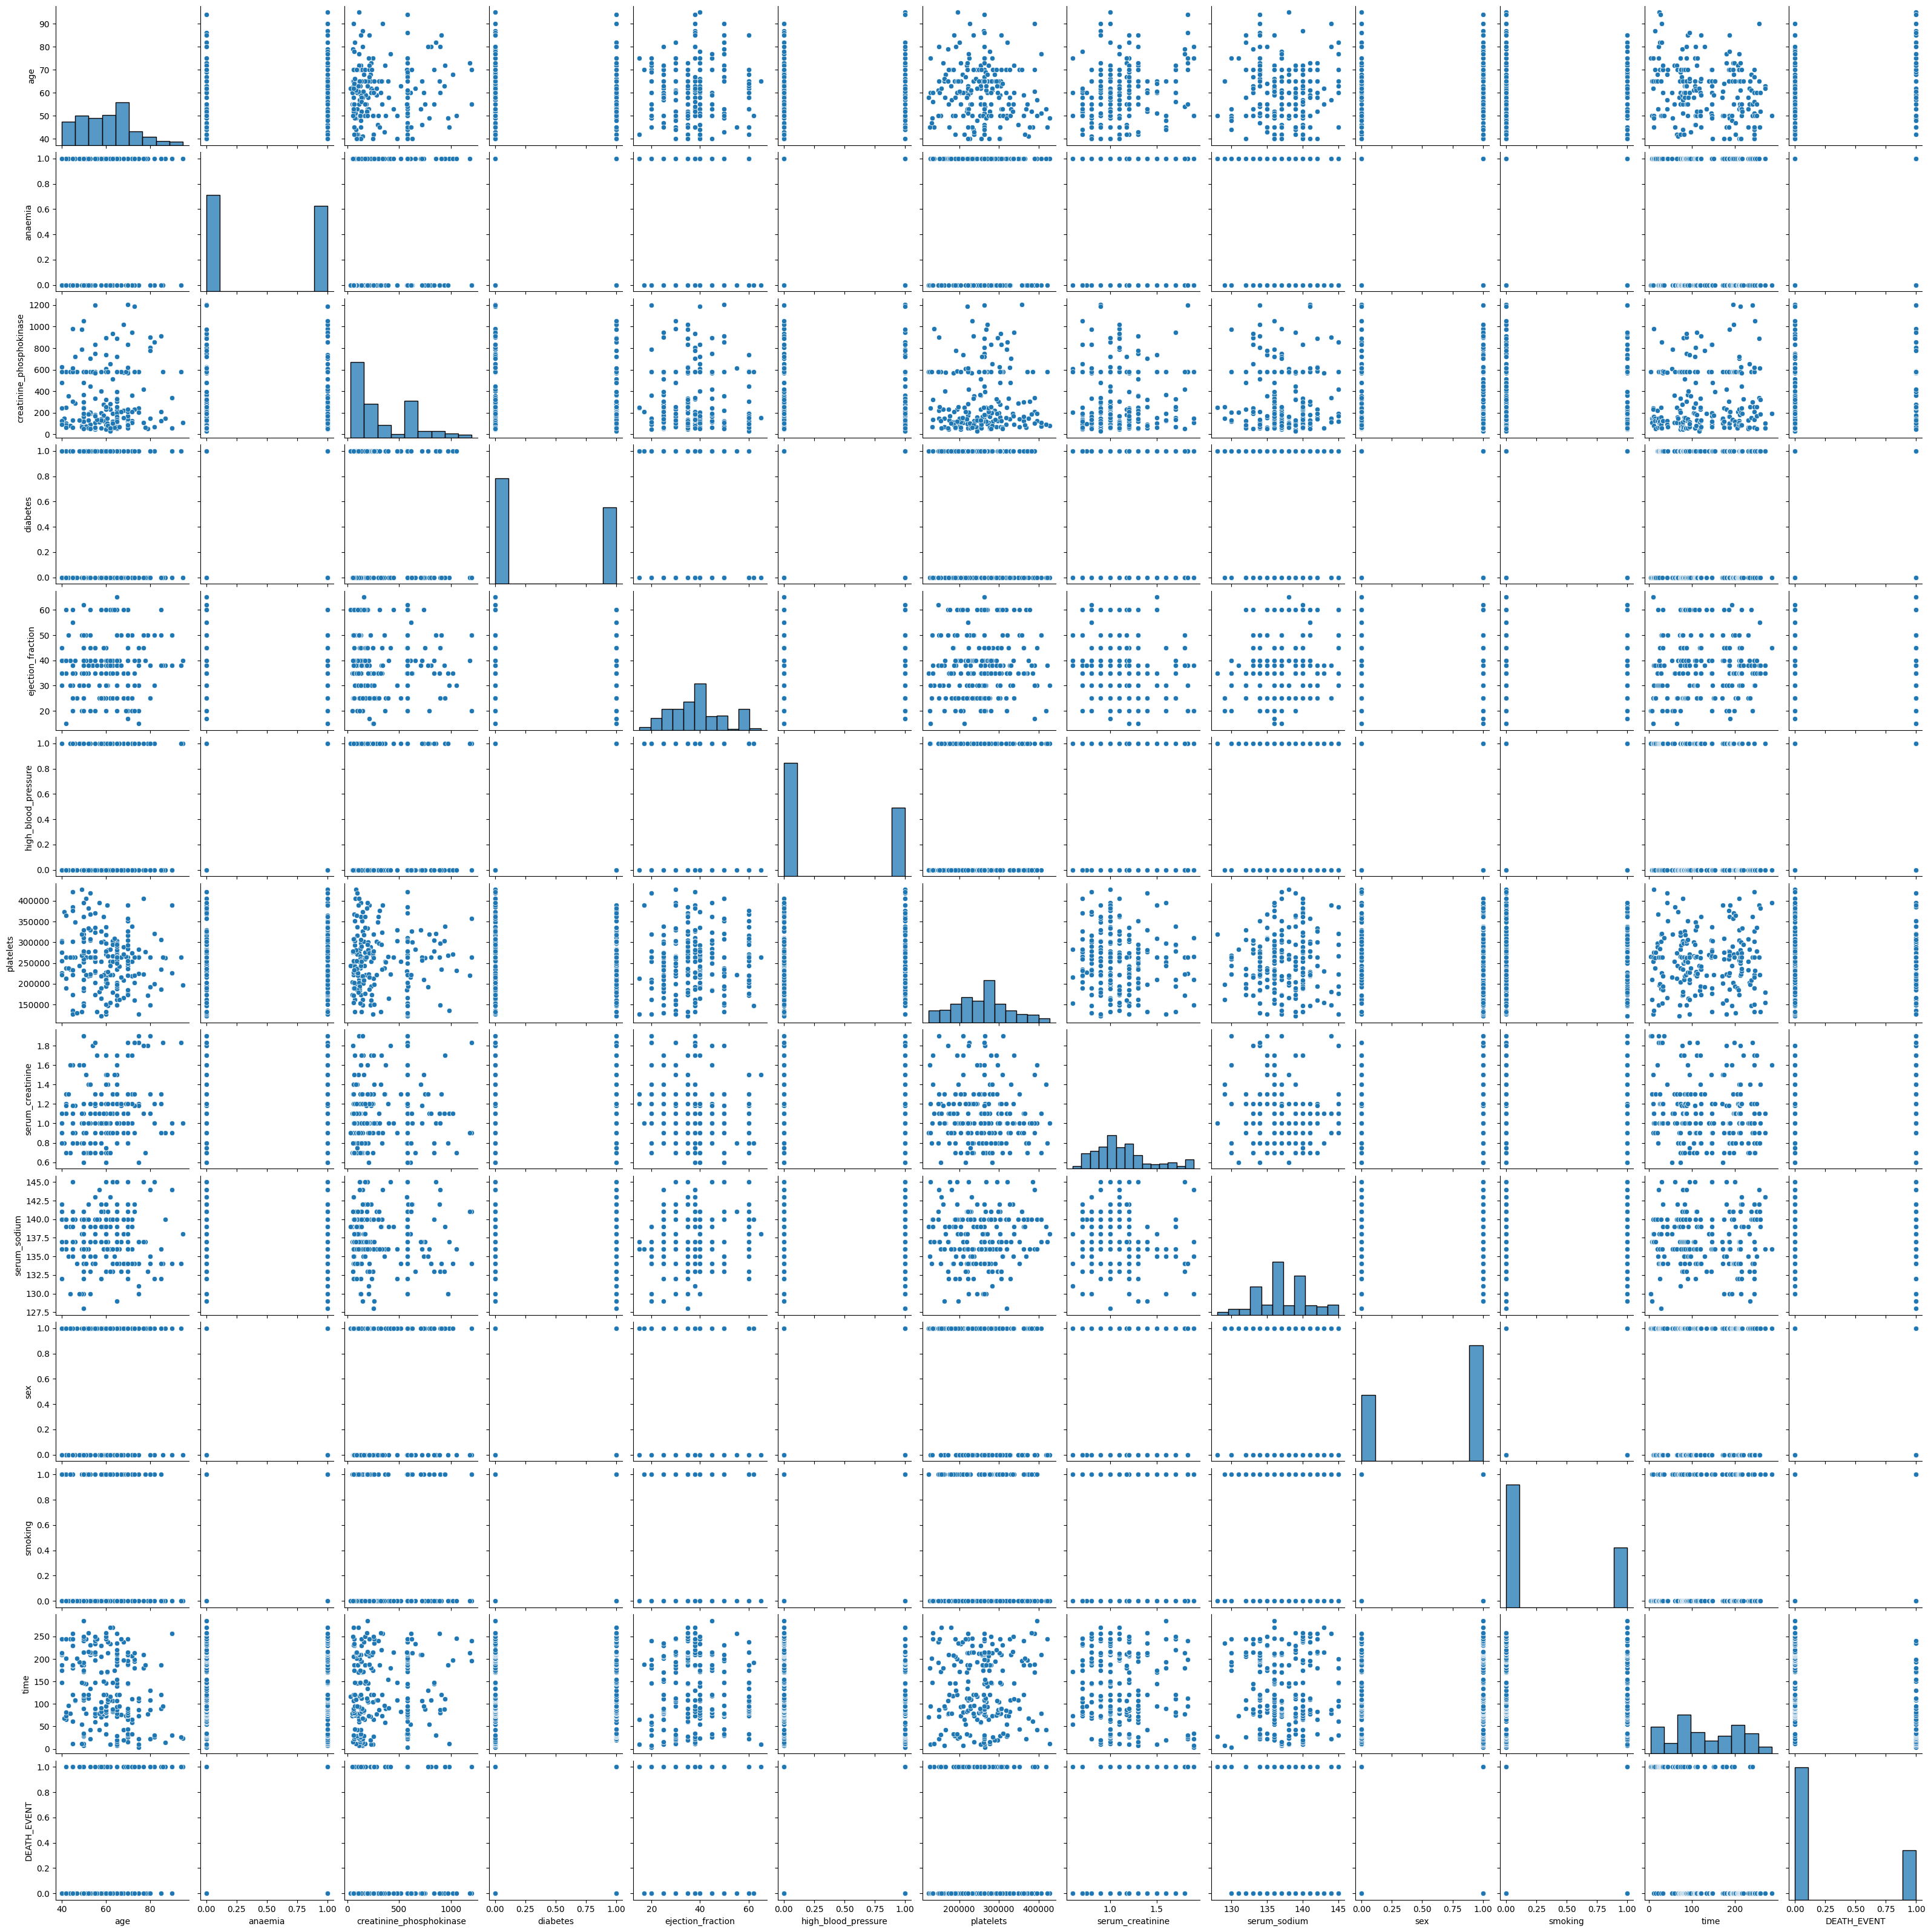

In [33]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

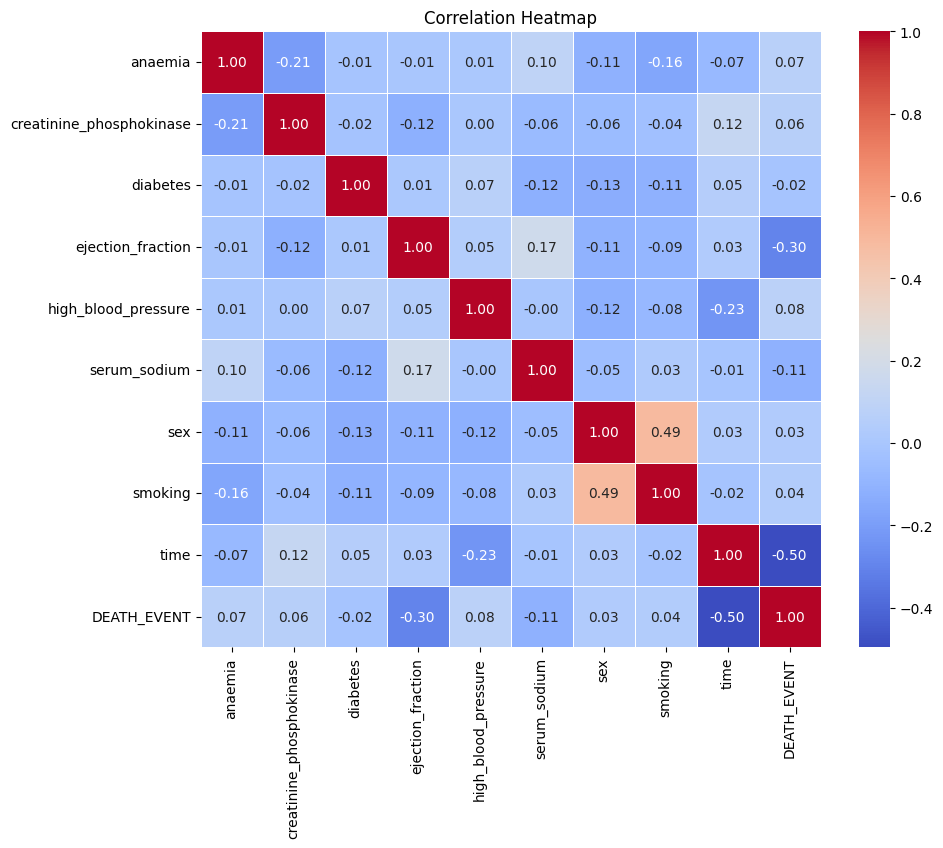

In [34]:
# heatmap
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes('int','float')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap')
plt.show()

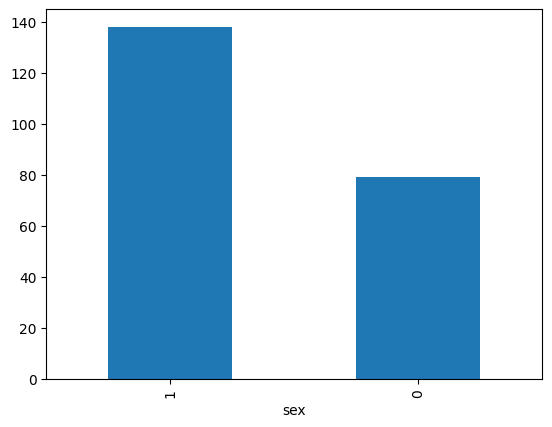

In [36]:
df['sex'].value_counts().plot(kind = 'bar')
plt.show()

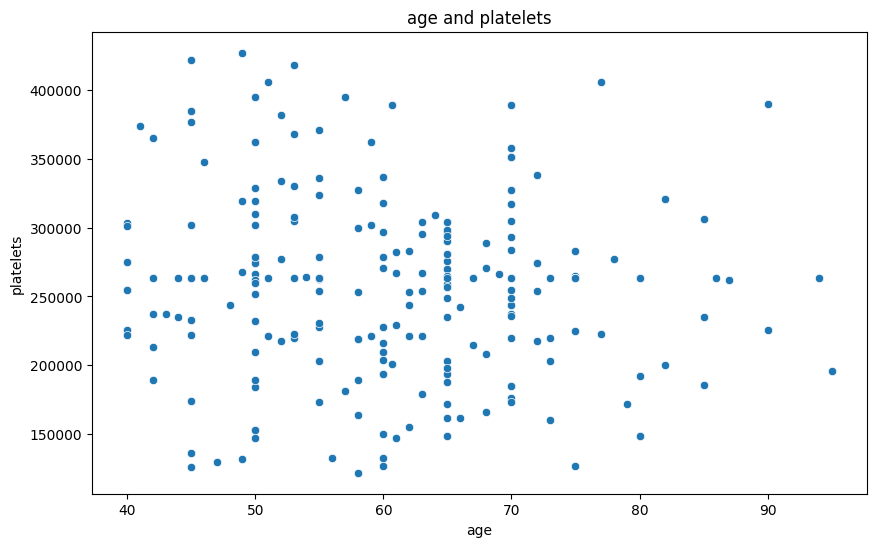

In [41]:
# age vs platelets
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['age'], y = df['platelets'])
plt.title('age and platelets')
plt.show()

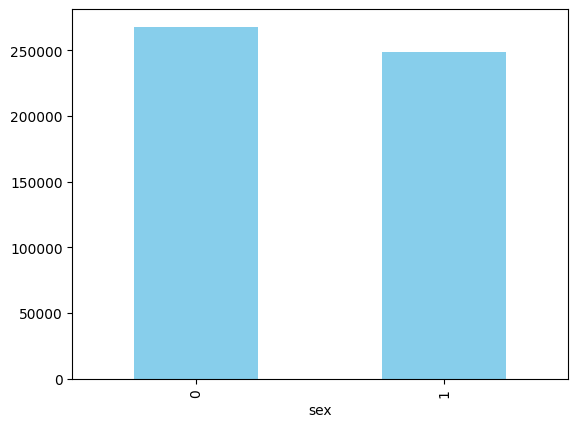

In [48]:
# avg platelets count vs gender 
df.groupby('sex')['platelets'].mean().plot(kind = 'bar' , color = 'skyblue')
plt.show()

In [49]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1


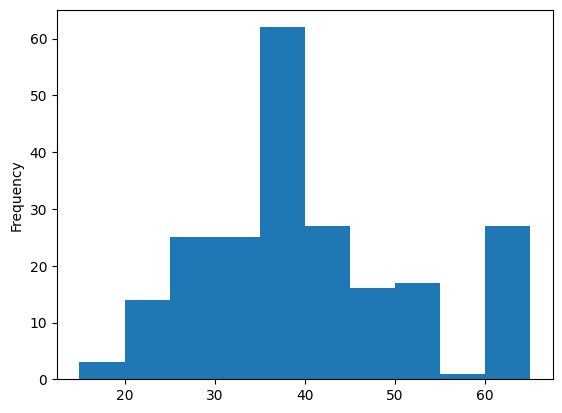

In [57]:
df['ejection_fraction'].plot(kind = 'hist')
plt.show()

# Model building and Evaluation

In [67]:
# Normalization

In [68]:
def normalize_columns(df, columns):
    for col in columns:
        # Min-max normalization: (x - min) / (max - min)
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

columns_to_normalize = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

normalize_columns(df, columns_to_normalize)

In [69]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.470990,0,0.1,1,0.468852,1.000000,0.117647,1,0,0.000000,1
2,0.454545,0,0.098976,0,0.1,0,0.131148,0.538462,0.058824,1,1,0.010676,1
3,0.181818,1,0.069113,0,0.1,0,0.288525,1.000000,0.529412,1,0,0.010676,1
6,0.636364,1,0.184300,0,0.0,0,0.016393,0.461538,0.529412,1,0,0.021352,1
8,0.454545,0,0.108362,0,1.0,0,0.463469,0.692308,0.588235,0,0,0.021352,1


In [70]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Assuming df contains your DataFrame with DEATH_EVENT as the target variable

# Step 1: Split the data into features (X) and target variable (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Initialize each classification model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Step 5-6: Train each model on the training data, make predictions on the test data, and calculate evaluation metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # You can change beta to adjust the emphasis on recall
    
    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F2 Score: {f2:.2f}\n")


Model: Logistic Regression
Accuracy: 0.83
Precision: 0.79
Recall: 0.91
F1 Score: 0.85
F2 Score: 0.89

Model: Decision Tree
Accuracy: 0.84
Precision: 0.82
Recall: 0.91
F1 Score: 0.86
F2 Score: 0.89

Model: Random Forest
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
F2 Score: 0.91

Model: Support Vector Machine
Accuracy: 0.83
Precision: 0.81
Recall: 0.88
F1 Score: 0.85
F2 Score: 0.87

